In [32]:
from spotipy.oauth2 import SpotifyOAuth
import spotipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [33]:
#needed for the Spotify api

client_id = "****************"
client_secret = "*******************"
redirect_uri = "http://localhost:1234"

In [34]:
# for the api call - to get top tracks
oauth_scopes="user-top-read"
t_range = "long_term"

#the api auth and call
auth_manager = SpotifyOAuth(client_id=client_id,
                                               client_secret=client_secret,
                                               redirect_uri=redirect_uri,
                                               scope=oauth_scopes)
sp = spotipy.Spotify(auth_manager=auth_manager)

user_top_tracks = sp.current_user_top_tracks(limit=50, time_range=t_range)

# dict for storing the track data
top_tracks = {"track":[],"album":[],"artist":[],"ID":[],"popularity":[],"release_date":[],"duration_ms":[], "artist_id":[]};

for i in user_top_tracks["items"]:
    
    top_tracks["track"].append(i['name'])
    top_tracks["album"].append(i['album']['name'])
    top_tracks["artist"].append(i['artists'][0]['name'])
    top_tracks["ID"].append(i['id'])
    top_tracks["popularity"].append(i['popularity'])
    top_tracks["release_date"].append(i['album']['release_date'])
    top_tracks["duration_ms"].append(i['duration_ms'])
    top_tracks["artist_id"].append(i['artists'][0]['id'])

#convert dict to df
df = pd.DataFrame.from_dict(top_tracks)   

#another api call to get tracks attributes
audio_analysis = sp.audio_features(df['ID'].tolist())

#convert it to df
df2 = pd.DataFrame.from_dict(audio_analysis)   

#merge to get one full df
df_full = pd.merge(df, df2, how='inner', left_on = 'ID', right_on = 'id')


#add genres for each artist
genres = []

for artist in df_full['artist_id']:
    genres.append(sp.artist(artist)['genres'])

df_full['genres'] = genres

df_full.head()

,track,album,artist,ID,popularity,release_date,duration_ms_x,artist_id,danceability,energy,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms_y,time_signature,genres
0,YMCA - Original Version 1978,YMCA,Village People,54OR1VDpfkBuOY5zZjhZAY,68,1978-01-01,286800,0dCKce6tJJdHvlWnDMwzPW,0.723,0.969,...,0.728,126.653,audio_features,54OR1VDpfkBuOY5zZjhZAY,spotify:track:54OR1VDpfkBuOY5zZjhZAY,https://api.spotify.com/v1/tracks/54OR1VDpfkBu...,https://api.spotify.com/v1/audio-analysis/54OR...,286800,4,[disco]
1,Let It Be - Remastered 2009,Let It Be (Remastered),The Beatles,7iN1s7xHE4ifF5povM6A48,74,1970-05-08,243026,3WrFJ7ztbogyGnTHbHJFl2,0.443,0.403,...,0.410,143.462,audio_features,7iN1s7xHE4ifF5povM6A48,spotify:track:7iN1s7xHE4ifF5povM6A48,https://api.spotify.com/v1/tracks/7iN1s7xHE4if...,https://api.spotify.com/v1/audio-analysis/7iN1...,243027,4,"[beatlesque, british invasion, classic rock, m..."
2,Here Comes The Sun - Remastered 2009,Abbey Road (Remastered),The Beatles,6dGnYIeXmHdcikdzNNDMm2,79,1969-09-26,185733,3WrFJ7ztbogyGnTHbHJFl2,0.557,0.540,...,0.394,129.171,audio_features,6dGnYIeXmHdcikdzNNDMm2,spotify:track:6dGnYIeXmHdcikdzNNDMm2,https://api.spotify.com/v1/tracks/6dGnYIeXmHdc...,https://api.spotify.com/v1/audio-analysis/6dGn...,185733,4,"[beatlesque, british invasion, classic rock, m..."
3,Imagine - Remastered 2010,Imagine,John Lennon,7pKfPomDEeI4TPT6EOYjn9,74,1971-09-09,187866,4x1nvY2FN8jxqAFA0DA02H,0.547,0.257,...,0.169,75.752,audio_features,7pKfPomDEeI4TPT6EOYjn9,spotify:track:7pKfPomDEeI4TPT6EOYjn9,https://api.spotify.com/v1/tracks/7pKfPomDEeI4...,https://api.spotify.com/v1/audio-analysis/7pKf...,187867,4,"[album rock, beatlesque, classic rock, mellow ..."
4,This Boy - Remastered 2009,Past Masters (Vols. 1 & 2 / Remastered),The Beatles,0oQshbv1BFLZ61b1tQ4Eqg,50,1988-03-07,136080,3WrFJ7ztbogyGnTHbHJFl2,0.660,0.337,...,0.703,110.173,audio_features,0oQshbv1BFLZ61b1tQ4Eqg,spotify:track:0oQshbv1BFLZ61b1tQ4Eqg,https://api.spotify.com/v1/tracks/0oQshbv1BFLZ...,https://api.spotify.com/v1/audio-analysis/0oQs...,136080,3,"[beatlesque, british invasion, classic rock, m..."


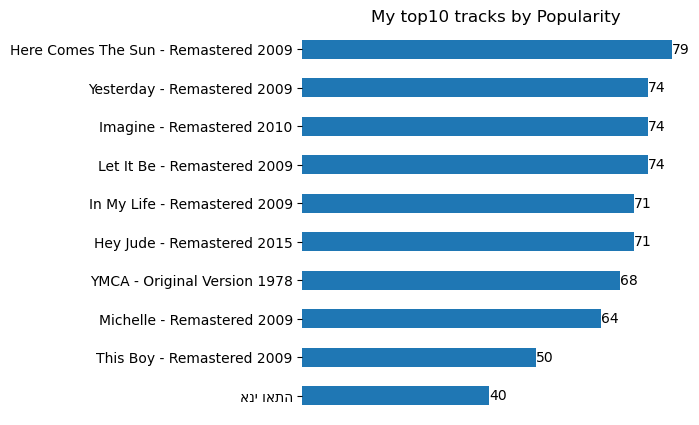

In [35]:
#plot top10 tracks by popularity
ax = df_full.iloc[:10].sort_values(by='popularity').plot(x='track', y='popularity', kind ="barh", figsize=(5, 5))
ax.get_xaxis().set_visible(False)
ax.get_legend().remove()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.ylabel("")

plt.title('My top10 tracks by Popularity')

plt.bar_label(ax.containers[0])
plt.legend
plt.show()

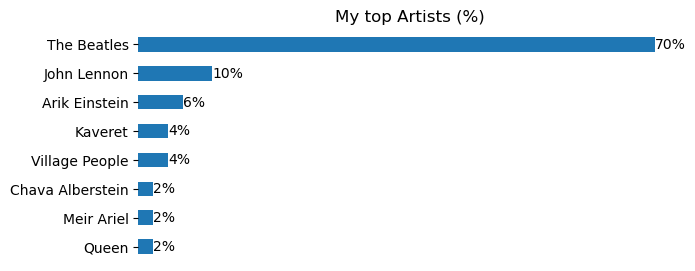

In [36]:
#plot top10 artists by tracks count
data = df_full['artist'].value_counts(normalize=True) * 100

ax = data.sort_values().plot(kind="barh", figsize=(7, 3)) 
ax.get_xaxis().set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('My top Artists (%)')
plt.bar_label(ax.containers[0], fmt='%.0f%%')
plt.show()

C:\Users\nisan\AppData\Local\Temp\ipykernel_36404\2934552580.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes[column] = df_attributes[column]  / df_attributes[column].abs().max()


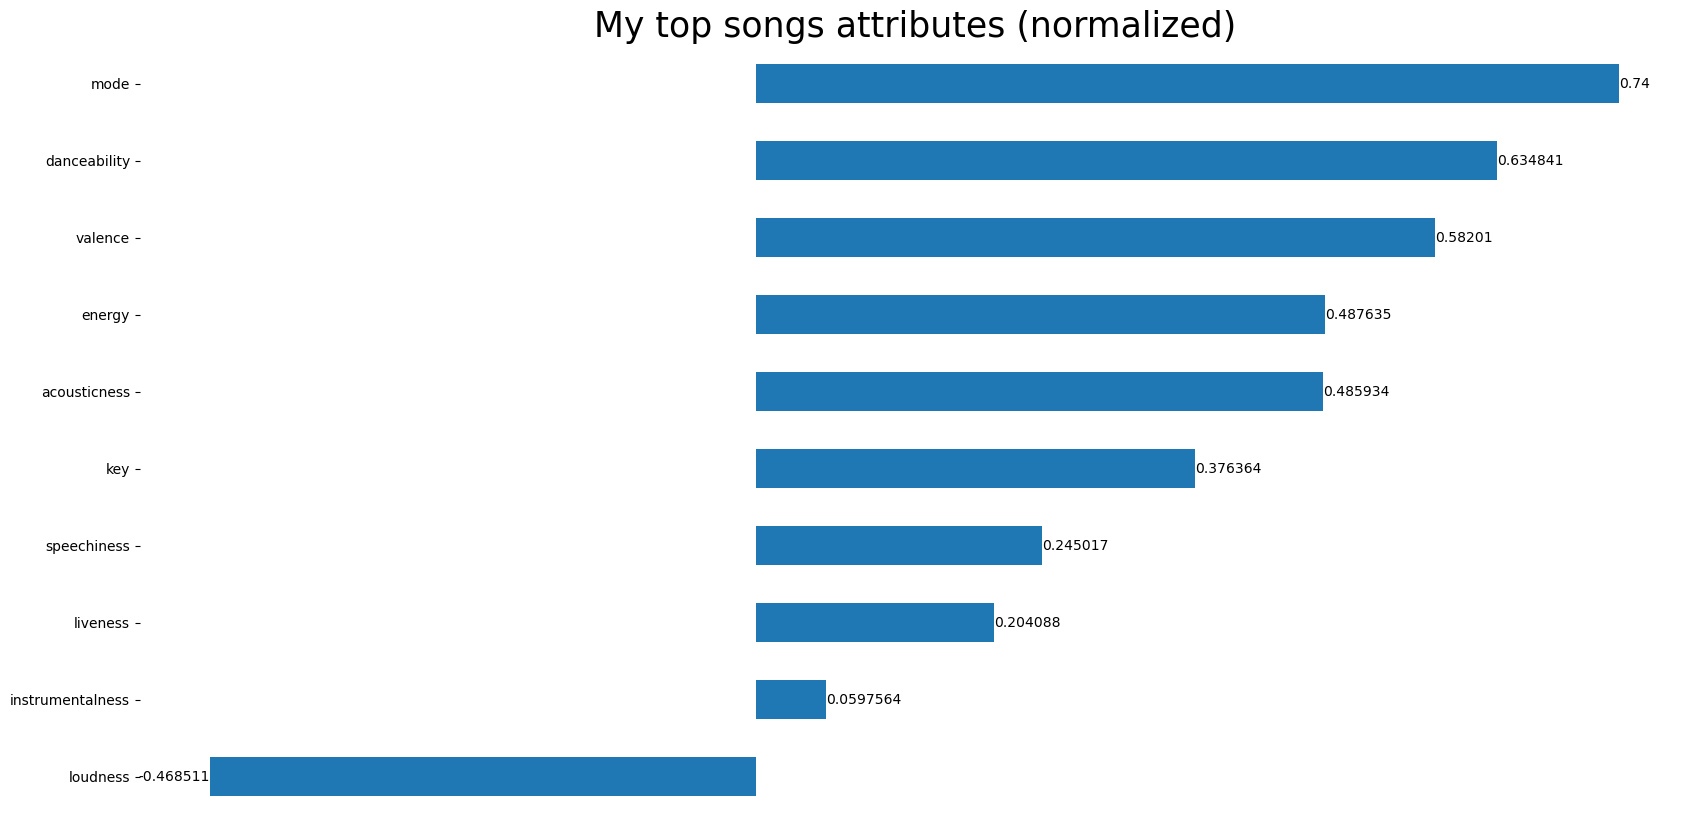

In [37]:
#plot top songs attributes

df_attributes = df_full[['danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence']]

for column in df_attributes.columns:
    df_attributes[column] = df_attributes[column]  / df_attributes[column].abs().max()

ax = df_attributes.mean().sort_values(ascending=True).plot(kind="barh", figsize=(20, 10), ) 
ax.get_xaxis().set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.title('My top songs attributes (normalized)').set_size(25)
plt.bar_label(ax.containers[0])
plt.show()

C:\Users\nisan\AppData\Local\Temp\ipykernel_36404\64022109.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_attributes['track'] = df_full['track']


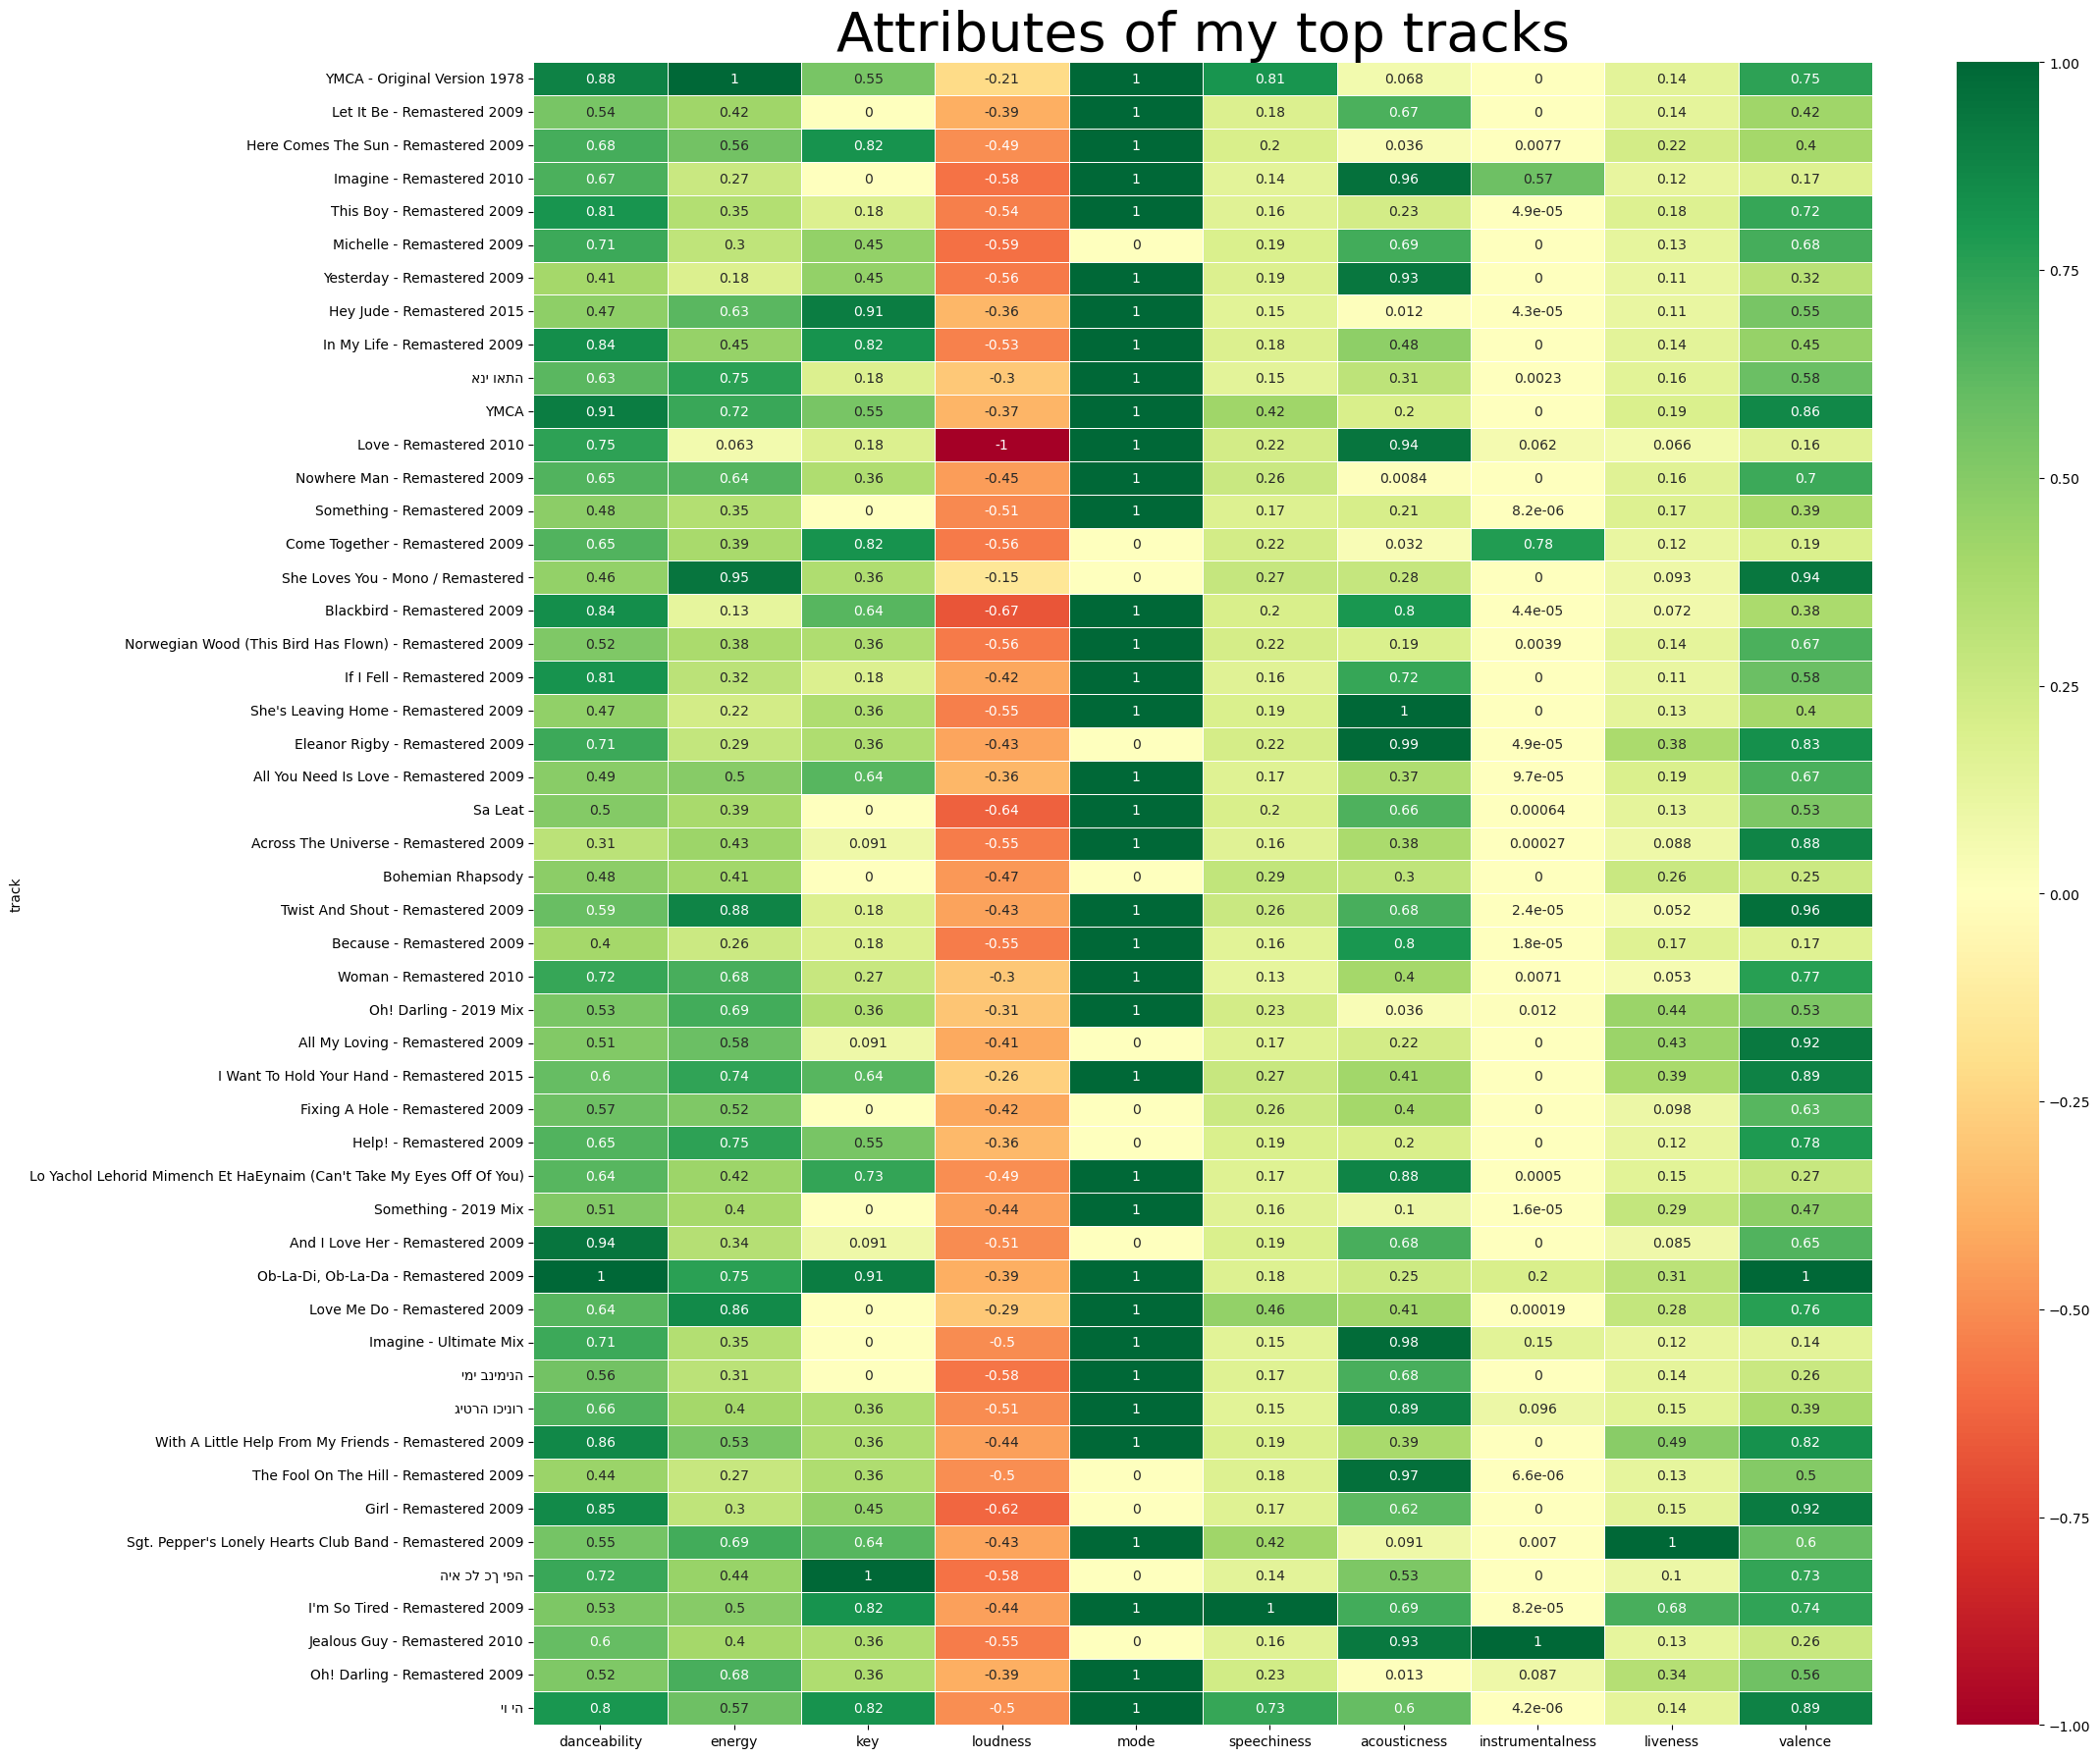

In [38]:
# Plot the attributes of my top songs

df_attributes['track'] = df_full['track']


plt.figure(figsize = (22,22))



sns.heatmap(df_attributes.set_index('track'), annot=True, linewidths=.5, cmap="RdYlGn")

plt.title("Attributes of my top tracks").set_size(40)

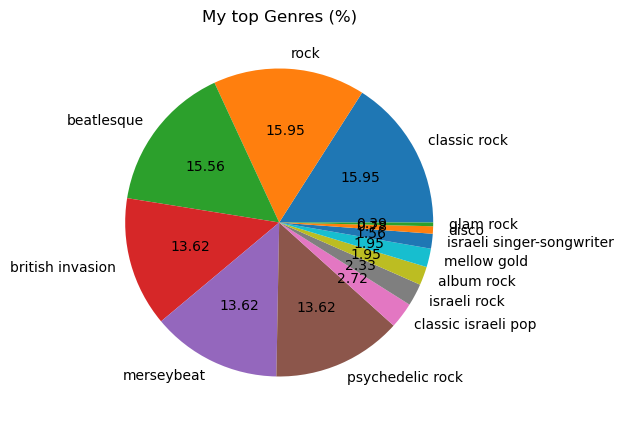

In [39]:
#plot favorite genres

flat_list = [item for sublist in df_full['genres'].tolist() for item in sublist]

x = pd.Series(flat_list)

data = x.value_counts(normalize=True) * 100
plot = data.plot.pie(y=data.values.tolist(), figsize=(5, 5), autopct='%.2f')
plt.ylabel("")

plt.title('My top Genres (%)')
plt.show()

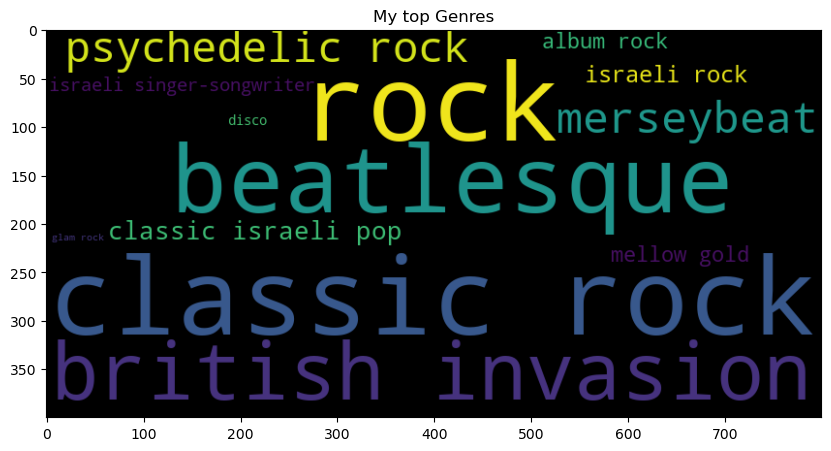

In [40]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS

wc = WordCloud(width=800, height=400, max_words=200).generate_from_frequencies(data)

plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation='bilinear')
plt.title('My top Genres')
plt.show()